<p><img src="../IMAGES/Logo-UFCG.png" width="80" ></p>

# Física Matemática II

## Cálculo Tensorial

**Luciano Barosi**

In [1]:
$BaseDirectory
$UserBaseDirectory

/usr/share/WolframEngine
/home/lbarosi/.WolframEngine

In [9]:
(*Carregando Pacotes*)
Quiet@Block[{Print},
  << xAct`xTensor`;
  << xAct`xCoba`;
  ]
(*Definindo opções úteis*)
$Pre = ScreenDollarIndices;
SetOptions[ContractMetric, AllowUpperDerivatives -> True];
$DefInfoQ = False;

In [14]:
(*Definindo Variedade*)
DefManifold[M, 4, 
 Complement[IndexRange[a, z], {g, h, n, x, y, z, t}]]
(*Definindo Métrica e derivada covariante CD*)
DefMetric[-1, 
 g[-a, -b], CD, {";", "\[Del]"}, PrintAs -> "g"]

In [18]:
(*Função pega uma identidade e transforma numa regra*)

ApplyRuleN[expr_] := 
  MakeRule[Evaluate[List @@ expr], MetricOn -> All];

In [20]:
DefTensor[X[a], M]
DefTensor[X1[a], M, PrintAs -> 
\!\(\*OverscriptBox[\(X\), \(~\)]\)]
DefTensor[V[a], M]
DefTensor[V1[a], M]

In [27]:
(*Derivadas de Vetores não são Vetores*)
V1[a] == PD[-b][X[a]] V[b]
PD[-c][PD[-b][X[a]] V[b]]

V1[a] == V[b] PD[-b][X[a]]
Plus[Times[PD[Times[-1, b]][X[a]], PD[Times[-1, c]][V[b]]], 
 
>   Times[V[b], PD[Times[-1, c]][PD[Times[-1, b]][X[a]]]]]

-(ChristoffelCD[d, -a, -c] g[-b, -d]) - ChristoffelCD[d, -a, -b] g[-d, -c] + 
 
>   PD[-a][g[-b, -c]]
-(ChristoffelCD[d, -c, -b] g[-a, -d]) - ChristoffelCD[d, -c, -a] g[-d, -b] + 
 
>   PD[-c][g[-a, -b]]
-(ChristoffelCD[d, -b, -a] g[-c, -d]) - ChristoffelCD[d, -b, -c] g[-d, -a] + 
 
>   PD[-b][g[-c, -a]]
-2 ChristoffelCD[d, -b, -c] g[-a, -d] - PD[-a][g[-b, -c]] + PD[-b][g[-a, -c]] + 
 
>    PD[-c][g[-a, -b]] == 0
-2 ChristoffelCD[f, -b, -c] - g[f, a] PD[-a][g[-b, -c]] + g[f, a] PD[-b][g[-c, -a]] + 
 
>    g[f, a] PD[-c][g[-b, -a]] == 0
ChristoffelCD[f, -b, -c] == 
 
     g[f, a] (-PD[-a][g[-b, -c]] + PD[-b][g[-c, -a]] + PD[-c][g[-b, -a]])
>    --------------------------------------------------------------------
                                      2
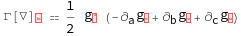

In [35]:
(*Símbolos de Christoffel definem derivada covariante compatível com \
a métrica*)
Hold[CD[-a][g[-b, -c]]] // CovDToChristoffel // ReleaseHold
Hold[CD[-c][g[-a, -b]]] // CovDToChristoffel // ReleaseHold
Hold[CD[-b][g[-c, -a]]] // CovDToChristoffel // ReleaseHold
% + %% - %%% == 0 // Simplification
eqs = g[f, a] % // ToCanonical
ChristoffelG = 
 Equal @@ (Solve[eqs, Union@Cases[eqs, _ChristoffelCD, Infinity]] // 
       Flatten // First) // ToCanonical // Simplification

(g[c, w$8841] (g[w$8842, w$8846] (PDg[-a, -w$8838, -w$8842] PDg[-b, -w$8841, -w$8846] - 
 
>          PDg[-a, -w$8842, -w$8838] PDg[-b, -w$8841, -w$8846] - 
 
>          PDg[-a, -w$8838, -w$8842] PDg[-b, -w$8846, -w$8841] + 
 
>          PDg[-a, -w$8842, -w$8838] PDg[-b, -w$8846, -w$8841] - 
 
>          PDg[-b, -w$8841, -w$8842] PDg[-w$8838, -w$8846, -a] + 
 
>          PDg[-b, -w$8842, -w$8841] PDg[-w$8838, -w$8846, -a] + 
 
>          PDg[-a, -w$8842, -w$8841] 
 
>           (PDg[-b, -w$8838, -w$8846] - PDg[-b, -w$8846, -w$8838] - 
 
>             PDg[-w$8838, -w$8846, -b]) + 
 
>          PDg[-a, -w$8841, -w$8842] 
 
>           (-PDg[-b, -w$8838, -w$8846] + PDg[-b, -w$8846, -w$8838] + 
 
>             PDg[-w$8838, -w$8846, -b]) - 
 
>          PDg[-w$8838, -w$8846, -b] PDg[-w$8841, -w$8842, -a] + 
 
>          PDg[-b, -w$8838, -w$8842] PDg[-w$8841, -w$8846, -a] - 
 
>          PDg[-b, -w$8842, -w$8838] PDg[-w$8841, -w$8846, -a] - 
 
>          PDg[-a, -w$8838, -w$8842] PDg[-w$8841, -w$8846, -b] + 
 
>          PDg[-a, -w$8842, -w$8838] PDg[-w$8841, -w$8846, -b] + 
 
>          PDg[-w$8838, -w$8842, -a] PDg[-w$8841, -w$8846, -b]) + 
 
>       2 (PDPDg[-a, -w$8838, -b, -w$8841] - PDPDg[-a, -w$8841, -b, -w$8838] - 
 
>          PDPDg[-b, -w$8838, -a, -w$8841] + PDPDg[-b, -w$8841, -a, -w$8838])) V[w$8838])
 
>     / 4
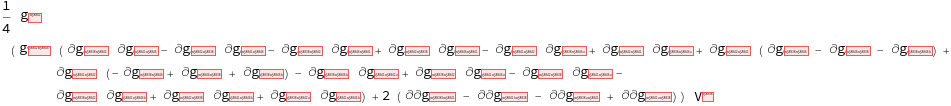

In [30]:
(*Derivadas Covariantes não comutam*)

CD[-a][CD[-b][V[c]]] - CD[-b][CD[-a][V[c]]] // CovDToChristoffel // 
   ChristoffelToMetric // Implode // Simplification


(g[c, w$9920] (g[w$9921, w$9925] (PDg[-a, -w$9917, -w$9921] PDg[-b, -w$9920, -w$9925] - 
 
>          PDg[-a, -w$9921, -w$9917] PDg[-b, -w$9920, -w$9925] - 
 
>          PDg[-a, -w$9917, -w$9921] PDg[-b, -w$9925, -w$9920] + 
 
>          PDg[-a, -w$9921, -w$9917] PDg[-b, -w$9925, -w$9920] - 
 
>          PDg[-b, -w$9920, -w$9921] PDg[-w$9917, -w$9925, -a] + 
 
>          PDg[-b, -w$9921, -w$9920] PDg[-w$9917, -w$9925, -a] + 
 
>          PDg[-a, -w$9921, -w$9920] 
 
>           (PDg[-b, -w$9917, -w$9925] - PDg[-b, -w$9925, -w$9917] - 
 
>             PDg[-w$9917, -w$9925, -b]) + 
 
>          PDg[-a, -w$9920, -w$9921] 
 
>           (-PDg[-b, -w$9917, -w$9925] + PDg[-b, -w$9925, -w$9917] + 
 
>             PDg[-w$9917, -w$9925, -b]) - 
 
>          PDg[-w$9917, -w$9925, -b] PDg[-w$9920, -w$9921, -a] + 
 
>          PDg[-b, -w$9917, -w$9921] PDg[-w$9920, -w$9925, -a] - 
 
>          PDg[-b, -w$9921, -w$9917] PDg[-w$9920, -w$9925, -a] - 
 
>          PDg[-a, -w$9917, -w$9921] PDg[-w$9920, -w$9925, -b] + 
 
>          PDg[-a, -w$9921, -w$9917] PDg[-w$9920, -w$9925, -b] + 
 
>          PDg[-w$9917, -w$9921, -a] PDg[-w$9920, -w$9925, -b]) + 
 
>       2 (PDPDg[-a, -w$9917, -b, -w$9920] - PDPDg[-a, -w$9920, -b, -w$9917] - 
 
>          PDPDg[-b, -w$9917, -a, -w$9920] + PDPDg[-b, -w$9920, -a, -w$9917])) V[w$9917])
 
>     / 4
g[-b, -w$10567] g[c, w$10564] V[d] (-(ChristoffelCD[w$10567, -w$10564, -w$10570] 
 
>        ChristoffelCD[w$10570, -d, -a]) + 
 
>     ChristoffelCD[w$10567, -d, -w$10570] ChristoffelCD[w$10570, -w$10564, -a] + 
 
>     PD[-d][ChristoffelCD[w$10567, -w$10564, -a]] - 
 
>     PD[-w$10564][ChristoffelCD[w$10567, -d, -a]])
g[-b, -w$10567] g[c, w$10564] V[d] (-(g[w$10567, w$10574] g[w$10570, w$10577] 
 
>         (PD[-w$10564][g[-w$10570, -w$10574]] + PD[-w$10570][g[-w$10564, -w$10574]] - 
 
>           PD[-w$10574][g[-w$10564, -w$10570]]) 
 
>         (PD[-a][g[-d, -w$10577]] + PD[-d][g[-a, -w$10577]] - PD[-w$10577][g[-d, -a]]))\
 
>       / 4 + (g[w$10567, w$10580] g[w$10570, w$10583] 
 
>        (PD[-d][g[-w$10570, -w$10580]] + PD[-w$10570][g[-d, -w$10580]] - 
 
>          PD[-w$10580][g[-d, -w$10570]]) 
 
>        (PD[-a][g[-w$10564, -w$10583]] + PD[-w$10564][g[-a, -w$10583]] - 
 
>          PD[-w$10583][g[-w$10564, -a]])) / 4 + 
 
>     (g[w$10567, w$10586] (PD[-d][PD[-a][g[-w$10564, -w$10586]]] + 
 
>           PD[-d][PD[-w$10564][g[-a, -w$10586]]] - PD[-d][PD[-w$10586][g[-w$10564, -a]]]
 
>           ) - g[w$10567, w$10589] g[w$10586, w$10590] PD[-d][g[-w$10589, -w$10590]] 
 
>         (PD[-a][g[-w$10564, -w$10586]] + PD[-w$10564][g[-a, -w$10586]] - 
 
>           PD[-w$10586][g[-w$10564, -a]])) / 2 + 
 
>     (-(g[w$10567, w$10592] (PD[-w$10564][PD[-a][g[-d, -w$10592]]] + 
 
>             PD[-w$10564][PD[-d][g[-a, -w$10592]]] - 
 
>             PD[-w$10564][PD[-w$10592][g[-d, -a]]])) + 
 
>        g[w$10567, w$10595] g[w$10592, w$10596] PD[-w$10564][g[-w$10595, -w$10596]] 
 
>         (PD[-a][g[-d, -w$10592]] + PD[-d][g[-a, -w$10592]] - PD[-w$10592][g[-d, -a]]))\
 
>       / 2)
0
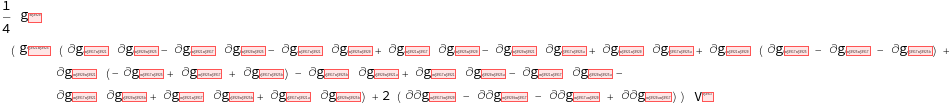
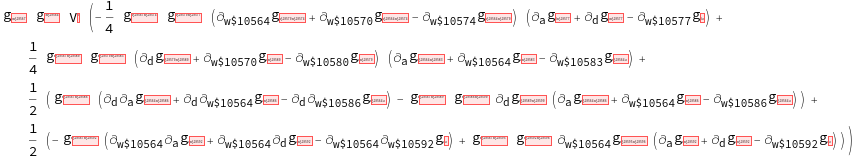

In [32]:
(*Tensor de Curvatura mede a não-comutatividade das derivadas*)

CD[-a][CD[-b][V[c]]] - CD[-b][CD[-a][V[c]]] // CovDToChristoffel // 
   ChristoffelToMetric // Implode // Simplification
RiemannCD[c, -d, -a, -b] V[d] // RiemannToChristoffel
% // ChristoffelToMetric
% - %%% // Implode // Simplification